In [1]:
import pandas as pd
df = pd.read_csv('../data/etf/spy.csv', parse_dates=True, index_col=0)
df.rename(columns={'Close':'SPY'}, inplace=True)
df.drop(['Open','High','Low','Volume','Dividends','Stock Splits'],
        axis=1,
        inplace=True)
df.dropna(axis=0, inplace=True)
df

,SPY
Date,
2017-01-03,210.63
2017-01-04,211.88
2017-01-05,211.71
2017-01-06,212.47
2017-01-09,211.77
...,...
2017-04-24,222.75
2017-04-25,224.04
2017-04-26,223.90


$$\begin{array}{ccc}
\mbox{Discrete Daily Return}&&r_t^{(D)}=\frac{S_t-S_{t-1}}{S_{t-1}}\\
\mbox{Continuous Daily Return}&&r_t^{(C)}=\log\frac{S_t}{S_{t-1}}\\
\end{array}$$

In [2]:
import numpy as np
df['Return_D'] = df.pct_change() 
df['Return_C'] = np.log(df['SPY']/df['SPY'].shift(1))
df

,SPY,Return_D,Return_C
Date,,,
2017-01-03,210.63,NaN,NaN
2017-01-04,211.88,0.005935,0.005917
2017-01-05,211.71,-0.000802,-0.000803
2017-01-06,212.47,0.003590,0.003583
2017-01-09,211.77,-0.003295,-0.003300
...,...,...,...
2017-04-24,222.75,0.011029,0.010969
2017-04-25,224.04,0.005791,0.005775
2017-04-26,223.90,-0.000625,-0.000625


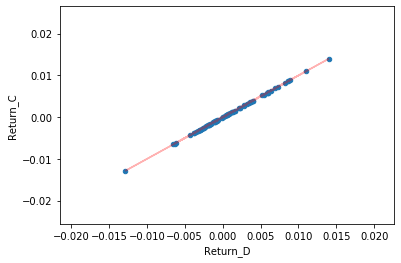

In [4]:
import matplotlib.pyplot as plt
df[['Return_D','Return_C']].plot(kind='scatter', 
                                 x='Return_D', 
                                 y='Return_C')
plt.plot(df['Return_D'], df['Return_D'], 'r', alpha=0.3)
plt.show()